In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 81 # number of grid points in x
tau = 1.6666 # time step in t
L = 4000.0 # system size in meters
h = L/(N-1)
#v_max = 30.0 # in m/s ... approx. 60 mph

coeff = tau/(2.0*h)
coefflw = tau**2/(2*h**2)

print ('Coefficient = ',coeff)
#print ('Characteristic time = ',h/v_max)

nStep = 100

print ('End time = ',nStep*tau)

Coefficient =  0.016666
End time =  166.66


In [3]:
#
# Initial conditions
#
rho_max = 0.6
rho_min = 0.2
Flow = np.empty(N)
cp = np.empty(N); cm = np.empty(N)
v_max = np.zeros(N)

# Initial setup
rho = np.zeros(N)
for i in range(0,N):
    rho[i] = rho_min
    v_max[i]=30.0
for i in range(int(N/5),int(N/5+2)):
    rho[i] = rho_max
for i in range(int(2*N/5),int(2*N/5+2)):
    rho[i] = rho_max
for i in range(int(3*N/5),int(3*N/5+2)):
    rho[i] = rho_max
for i in range(int(4*N/5),int(4*N/5+2)):
    rho[i] = rho_max
    
for i in range(int(7*N/8),int(N)):
    v_max[i] = 15.0
    
rho[int(N/5+2)]=(rho_max+rho_min)/2.0
rho[int(2*N/5+2)]=(rho_max+rho_min)/2.0
rho[int(3*N/5+2)]=(rho_max+rho_min)/2.0 
rho[int(4*N/5+2)]=(rho_max+rho_min)/2.0 

# Periodic boundary conditions
ip = np.arange(N) + 1
ip[N-1] = 0
im = np.arange(N) - 1
im[0] = N-1

In [4]:
iplot = 1
xplot = (np.arange(N)+1./2.)*h

In [5]:
rplot = np.empty((N,nStep+1))
rplot[:,0]=np.copy(rho)

#print (rho)
#print (rplot[:,0])

tplot = np.empty(nStep+1)
tplot[0] = 0

for istep in range(nStep):
    
    # Compute the Flow = (density)*(velocity)
    Flow[:] = rho[:] * (v_max[:]*(1 - rho[:]/rho_max))
    
    # FTCS method
    #rho[:] = rho[:] - coeff*(Flow[ip]-Flow[im])
    # Lax method
    #rho[:] = 0.5*(rho[ip]+rho[im]) - coeff*(Flow[ip]-Flow[im])
    # Lax-Wendroff Method
    cp[:] = v_max[:]*(1 - (rho[ip]+rho[:])/rho_max)
    cm[:] = v_max[:]*(1 - (rho[:]+rho[im])/rho_max)
    rho[:] = rho[:] - coeff*(Flow[ip]-Flow[im]) + coefflw*(cp[:]*(Flow[ip]-Flow[:]) - cm[:]*(Flow[:]-Flow[im]))
    
    rplot[:,iplot] = np.copy(rho)
    tplot[iplot] = tau*(istep+1)

    iplot += 1

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

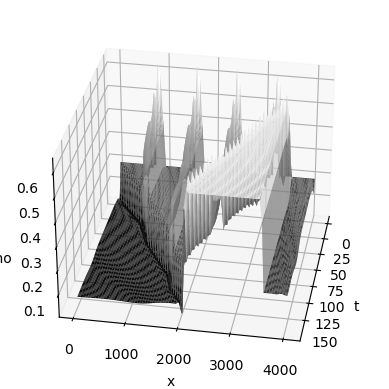

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
Tp, Xp = np.meshgrid(tplot[0:iplot], xplot)
ax.plot_surface(Tp,Xp,rplot[:,0:iplot],rstride=1,cstride=1,cmap=cm.gray)
ax.view_init(elev=30.,azim=10.)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('rho')
plt.show()

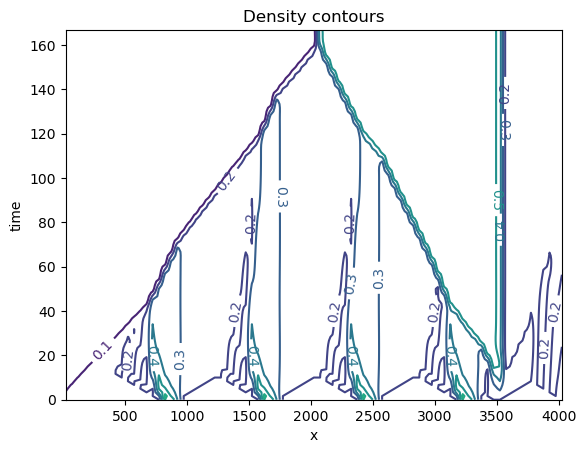

In [9]:
levels = np.linspace(0.,1.,num=11)
ct = plt.contour(xplot,tplot,np.flipud(np.rot90(rplot)), levels)
plt.clabel(ct,fmt='%1.1f')
plt.xlabel('x')
plt.ylabel('time')
plt.title('Density contours')
plt.show()

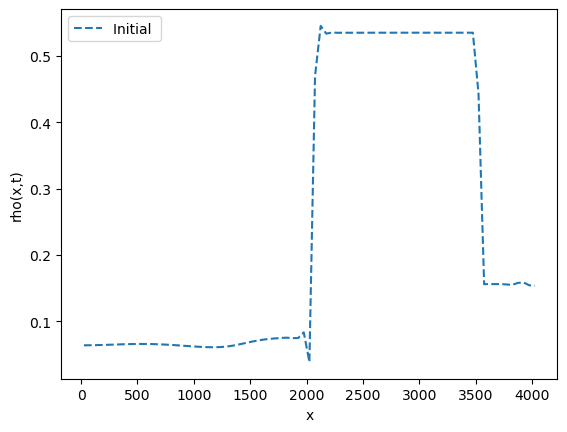

In [10]:
#plt.plot(xplot,rplot[:,0],'-',xplot,rplot,'--')
#plt.plot(xplot,rplot[:,0],'-',xplot,rplot[:,iplot-1],'--')
plt.plot(xplot,rplot[:,iplot-1],'--')
plt.legend(['Initial ','Final'])
plt.xlabel('x')
plt.ylabel('rho(x,t)')
plt.show()